In [155]:
import os
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split

# Classification

In [289]:
default = pd.read_csv("Default.csv")
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


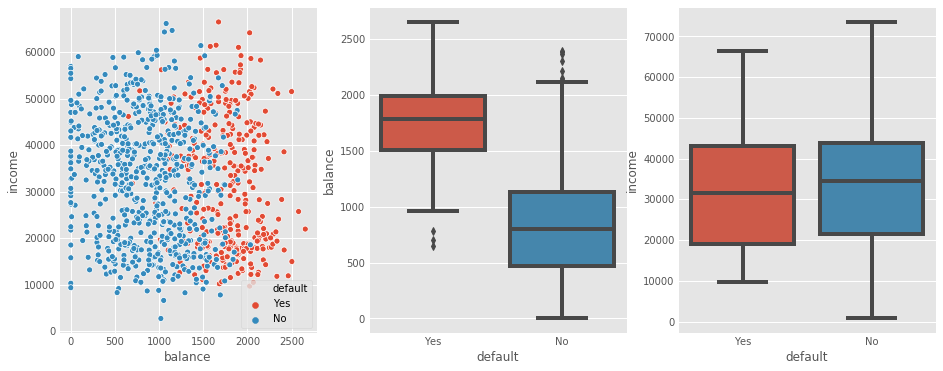

In [22]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(14,6))

sns.scatterplot(x="balance", y="income", data=default.iloc[1:1000,:], hue="default", ax=ax1)
sns.boxplot(x="default", y="balance", data=default, ax=ax2)
sns.boxplot(x="default", y="income", data=default, ax=ax3)

In [171]:
from sklearn.linear_model import LogisticRegression

X = default.filter(["balance"])
Y = default["default"].apply(lambda x: 1 if x == "Yes" else 0)

model = LogisticRegression()
model.fit(X,Y)
pred = model.predict_proba(X)[:,1]

print(model.intercept_, model.coef_)

[-10.65132824] [[0.00549892]]


In [172]:
X = sm.add_constant(X)

model2 = sm.Logit(Y,X).fit()
pred_sm = model2.predict(X)

model2.summary()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


C:\Users\svena\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Fri, 05 Jun 2020   Pseudo R-squ.:                  0.4534
Time:                        08:04:55   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [167]:
from sklearn.linear_model import LinearRegression

X = default.filter(["balance"])
Y = default["default"].apply(lambda x: 1 if x == "Yes" else 0)

model = LinearRegression()
model.fit(X,Y)
pred_lr = model.predict(X)

def sigmoid(x):
    return np.exp(x)/(1+np.exp(x))
pred_sig=sigmoid(pred_lr)

Text(0.5, 1.0, 'Logistic Regression Model (Sigmoid of Linear Regression)')

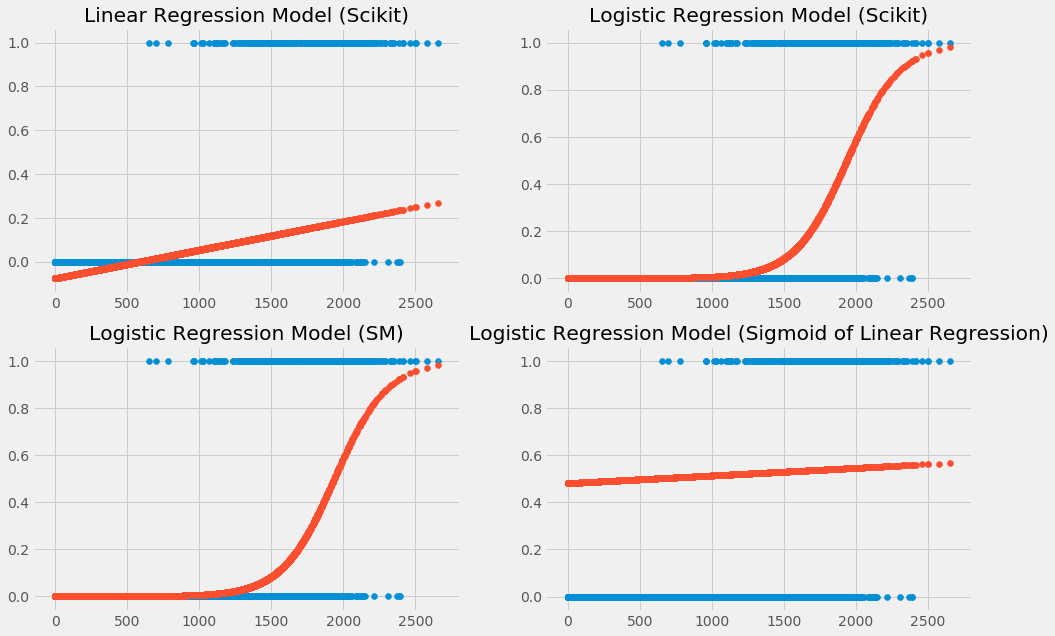

In [168]:
fig, ((ax1,ax2),
      (ax3, ax4)) = plt.subplots(2,2, figsize=(15,10))

ax1.scatter(X,Y)
ax1.scatter(X,pred_lr)
ax1.set_title("Linear Regression Model (Scikit)")

ax2.scatter(X,Y)
ax2.scatter(X,pred)
ax2.set_title("Logistic Regression Model (Scikit)")

ax3.scatter(X,Y)
ax3.scatter(X,pred_sm)
ax3.set_title("Logistic Regression Model (SM)")

ax4.scatter(X,Y)
ax4.scatter(X,pred_sig)
ax4.set_title("Logistic Regression Model (Sigmoid of Linear Regression)")

In [173]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Fri, 05 Jun 2020   Pseudo R-squ.:                  0.4534
Time:                        08:05:03   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Multiple linear regression

In [194]:
default_dummy = default.copy()
default_dummy["Std_dummy"] = default_dummy["student"].apply(lambda x: 1.0 if x == "Yes" else 0.0)
default_dummy["default_dummy"] = default_dummy["default"].apply(lambda x: 1.0 if x == "Yes" else 0.0)
default_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 5091 to 9999
Data columns (total 6 columns):
default          10000 non-null object
student          10000 non-null object
balance          10000 non-null float64
income           10000 non-null float64
Std_dummy        10000 non-null float64
default_dummy    10000 non-null float64
dtypes: float64(4), object(2)
memory usage: 546.9+ KB


In [203]:
X = (default_dummy
     .filter(["balance","income","Std_dummy"])
    )
X = sm.add_constant(X)
Y = default_dummy.filter(["default_dummy"])

model = sm.Logit(Y,X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          default_dummy   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Fri, 05 Jun 2020   Pseudo R-squ.:                  0.4619
Time:                        09:17:50   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                3.257e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
Std_dummy     -0.6468      0.236     -2.738      0.006      -1.110      -0.184
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [274]:
def get_default_rate():
    
    rates = list()
    
    for student in (0,1):
        data = default_dummy[default_dummy["Std_dummy"]==student]
        rate = pd.Series()
        zone = 0
        for zones in (1,500,1000,1500,2000,5000,8000,10000):
            rate[str(zones)] = np.mean(data[data["balance"].between(zone,zones)])["default_dummy"]
            zone = zones
        rate = pd.DataFrame(rate, columns=["Rate"+str(student)])
        rates.append(rate)
    return rates

rates=get_default_rate()

Text(0.5, 0, 'Student')

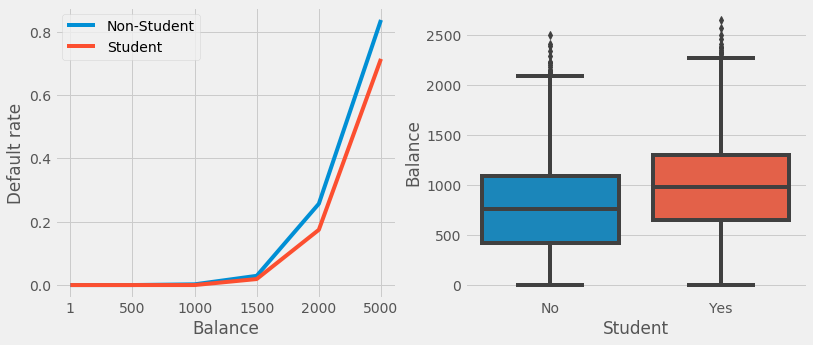

In [279]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

ax1.plot(rates[0])
ax1.plot(rates[1])
ax1.legend(labels=["Non-Student","Student"])
ax1.set_ylabel("Default rate")
ax1.set_xlabel("Balance")

sns.boxplot(x="student", y="balance", data=default, ax=ax2)
ax2.set_ylabel("Balance")
ax2.set_xlabel("Student")

In [270]:
default.head()

,default,student,balance,income
5091,Yes,No,1733.824679,26330.511729
241,Yes,Yes,1572.856481,14930.178331
4111,Yes,No,1644.696623,61474.934446
440,Yes,No,1119.097245,37224.567814
439,Yes,Yes,1118.701039,21848.442900


## Multiclass classification
### Linear Disriminant Analysis

[Text(0, 0.5, 'Pred Neg'), Text(0, 1.5, 'Pred Pos')]

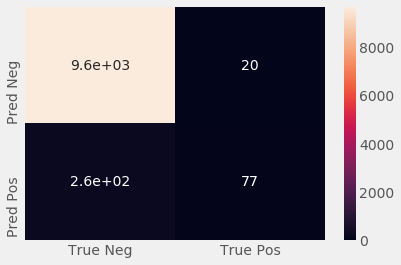

In [419]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

X = default.filter(["balance","income"])
Y = default["default"].apply(lambda x: 1 if x == "Yes" else 0)

clf = LinearDiscriminantAnalysis()
clf.fit(X,Y)

yhat = clf.predict(X)

ax = sns.heatmap(confusion_matrix(Y,yhat), annot=True)
ax.set_xticklabels(["True Neg","True Pos"])
ax.set_yticklabels(["Pred Neg","Pred Pos"])

In [475]:
tn, fp, tp, fn = confusion_matrix(Y,yhat).ravel()
# To match the textbook we use their numbers
tn, fp, fn, tp = 9644, 252, 23, 81

sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
print("Sensitivity (% of correctly identified defaulters): {0:.1%}, Specificity (% of correctly identified non-defaulters) {1:.1%}.".format(sensitivity,specificity))

def sen_spe(Y_true,Y_pred):
    tn, fp, fn, tp = confusion_matrix(Y_true,Y_pred).ravel()
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)
    #print("Sensitivity (% of correctly identified defaulters): {0:.1%}, Specificity (% of correctly identified non-defaulters) {1:.1%}.".format(sensitivity,specificity))
    return sensitivity, specificity

Sensitivity (% of correctly identified defaulters): 77.9%, Specificity (% of correctly identified non-defaulters) 97.5%.


In [476]:
clf = LinearDiscriminantAnalysis()
clf.fit(X,Y)
y_probs = clf.predict_proba(X)[:,1]
y_pred = [1 if row > 0.2 else 0 for row in y_probs]

In [477]:
sensitivity, specificity = sen_spe(Y,y_pred)

**Sensitivity** also called **Recall** is  the **true positive rate**, and the **specificity** is the **true negative rate**. To obtain the ROC curve we define the **false positive rate** = 1 - true negative rate. This is also called **Precision**

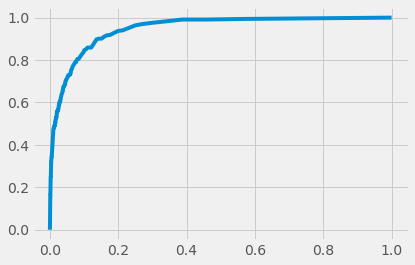

In [481]:
def ROC_curve(X,Y):
    sens = []
    spec = []
    
    clf = LinearDiscriminantAnalysis()
    clf.fit(X,Y)
    y_probs = clf.predict_proba(X)[:,1]

    thresholds = list(np.linspace(0,1,416))
    for threshold in thresholds:
        y_pred = [1 if prob > threshold else 0 for prob in y_probs]
        sensitivity, specificity = sen_spe(Y,y_pred)
        sens.append(sensitivity)
        spec.append(1-specificity)
        
    plt.plot(spec,sens)
    return sens,spec

sensitivity, minusspecificity = ROC_curve(X,Y)
    

Text(0, 0.5, 'True Positive Rate')

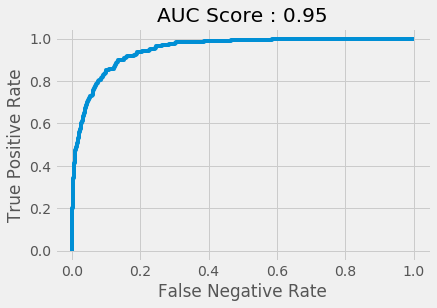

In [494]:
from sklearn.metrics import roc_curve, auc

clf = LinearDiscriminantAnalysis()
clf.fit(X,Y)
y_probs = clf.predict_proba(X)[:,1]

fpr, tpr, _ = roc_curve(Y,y_probs)
auc_score = auc(fpr,tpr)

plt.plot(fpr,tpr)
plt.title("AUC Score : {0:.2}".format(auc_score))
plt.xlabel("False Negative Rate")
plt.ylabel("True Positive Rate")
